In [4]:
##import csv
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

ruta = "../../../../data/processed_data/preliminar_estadisticas/region/region_total/estadisticas_total_comunas_13_Metropolitana de Santiago.csv"

df_pais = pd.read_csv(ruta)
df_pais.head()

,Código región,Región,Provincia,Comuna,poblacion_total,País o continente de nacimiento,poblacion_migrante,porcentaje
0,13,Metropolitana de Santiago,Santiago,Santiago,438856.0,Total nacidos fuera del país,176956,40.32
1,13,Metropolitana de Santiago,Santiago,Cerrillos,85041.0,Total nacidos fuera del país,12732,14.97
2,13,Metropolitana de Santiago,Santiago,Cerro Navia,127250.0,Total nacidos fuera del país,12654,9.94
3,13,Metropolitana de Santiago,Santiago,Conchalí,121587.0,Total nacidos fuera del país,17686,14.55
4,13,Metropolitana de Santiago,Santiago,El Bosque,155257.0,Total nacidos fuera del país,11347,7.31


In [5]:
# Cargar el archivo .geojson
gdf = gpd.read_file("../../comunas.geojson")

# Ver las primeras filas
print(gdf.head())

# Ver las columnas disponibles
print(gdf.columns)

   objectid   shape_leng  dis_elec  cir_sena  cod_comuna  codregion  \
0        48  170038.6241        16         8        6204          6   
1        29  125730.1047        15         8        6102          6   
2        30   63026.0844        15         8        6103          6   
3        31   89840.9035        15         8        6104          6   
4        78  122626.4932        23        11        9121          9   

     st_area_sh   st_length_                                    Region  \
0  9.685774e+08  206184.2716  Región del Libertador Bernardo O'Higgins   
1  4.157446e+08  151911.5768  Región del Libertador Bernardo O'Higgins   
2  1.448565e+08   76355.3261  Región del Libertador Bernardo O'Higgins   
3  3.256572e+08  108874.6231  Región del Libertador Bernardo O'Higgins   
4  6.990727e+08  156680.4106                    Región de La Araucanía   

      Comuna      Provincia                                           geometry  
0  Marchigüe  Cardenal Caro  POLYGON ((-71.8007

In [6]:
print(gdf['Region'].unique())

["Región del Libertador Bernardo O'Higgins" 'Región de La Araucanía'
 'Región Metropolitana de Santiago' 'Región de Los Lagos'
 'Región de Los Ríos' 'Región del Maule' 'Región de Coquimbo'
 'Región de Magallanes y Antártica Chilena' 'Zona sin demarcar'
 'Región de Valparaíso' 'Región del Bío-Bío'
 'Región de Aysén del Gral.Ibañez del Campo' 'Región de Tarapacá'
 'Región de Arica y Parinacota' 'Región de Antofagasta' 'Región de Ñuble'
 'Región de Atacama']


In [7]:
gdf_13 = gdf[gdf['Region'] == "Región Metropolitana de Santiago"]

# Guardar en un nuevo GeoJSON
gdf_13.to_file("region_13_comunas.geojson", driver="GeoJSON")

# Ver las comunas incluidas
print(gdf_13[['Comuna', 'Provincia']])

                  Comuna   Provincia
26           San Joaquín    Santiago
36            San Miguel    Santiago
47             San Ramón    Santiago
57         Independencia    Santiago
61           La Cisterna    Santiago
68             Peñalolén    Santiago
82           Providencia    Santiago
86              La Reina    Santiago
90       Calera de Tango       Maipo
109               Colina   Chacabuco
110             Santiago    Santiago
112                Lampa   Chacabuco
113               Pirque  Cordillera
119          Puente Alto  Cordillera
120           Huechuraba    Santiago
126         San Bernardo       Maipo
127             Curacaví   Melipilla
128          María Pinto   Melipilla
129            Cerrillos    Santiago
134          Cerro Navia    Santiago
135             Vitacura    Santiago
136             Conchalí    Santiago
137            El Bosque    Santiago
140     Estación Central    Santiago
145           La Florida    Santiago
146            La Granja    Santiago
1

In [8]:
gdf_rm = gdf_13.merge(df_pais[['Comuna', 'porcentaje']], on='Comuna', how='left')

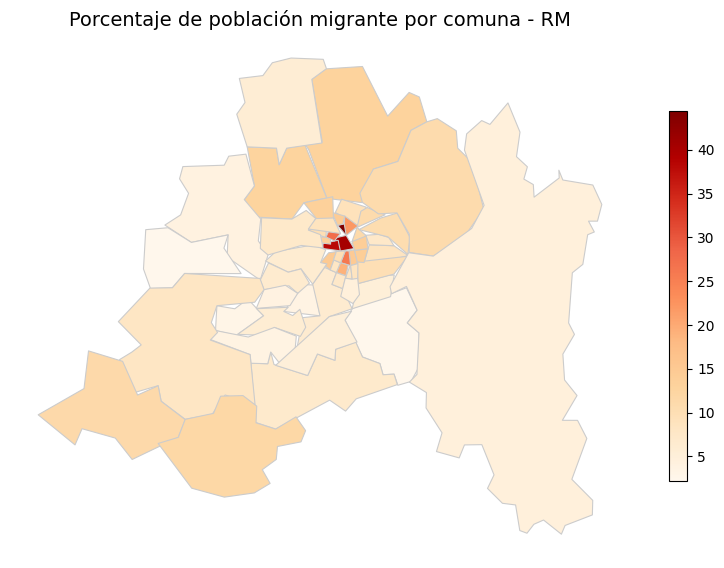

In [10]:
# Crear figura
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Graficar coropletas
gdf_rm.plot(column="porcentaje", 
            cmap="OrRd", 
            linewidth=0.8, 
            edgecolor="0.8", 
            legend=True,
            legend_kwds={"shrink": 0.4},
            ax=ax)



# Título y ajustes finales
ax.set_title("Porcentaje de población migrante por comuna - RM", fontsize=14)
ax.axis("off")

plt.show()

In [13]:
gdf_santiago=gdf_rm[gdf_rm['Provincia'] == "Santiago"]

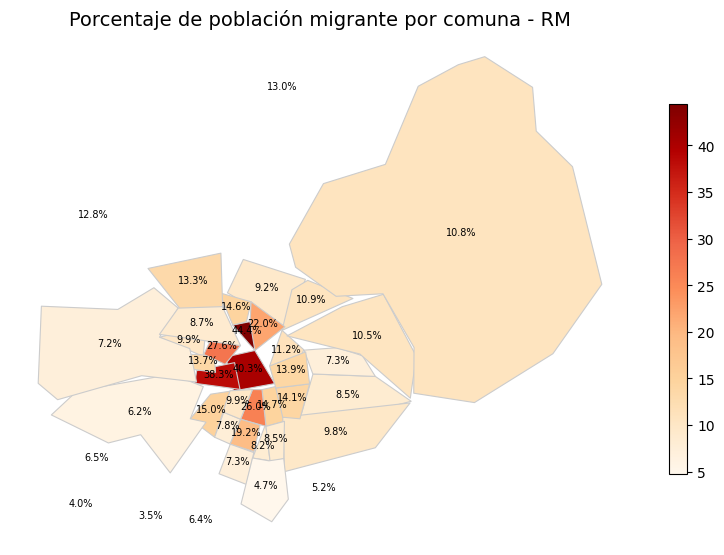

In [14]:
# Crear figura
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Graficar coropletas
gdf_santiago.plot(column="porcentaje", 
            cmap="OrRd", 
            linewidth=0.8, 
            edgecolor="0.8", 
            legend=True,
            legend_kwds={"shrink": 0.4},
            ax=ax)

# Etiquetas con porcentaje en el centroide de cada comuna
for idx, row in gdf_rm.iterrows():
    plt.annotate(
        text=f"{round(row['porcentaje'],1)}%",
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        ha='center',
        fontsize=7,
        color="black"
    )

# Título y ajustes finales
ax.set_title("Porcentaje de población migrante por comuna - RM", fontsize=14)
ax.axis("off")

plt.show()

C:\Users\Alan\AppData\Local\Temp\ipykernel_79412\2552171830.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="porcentaje", y="Comuna", data=df_plot, palette="OrRd")


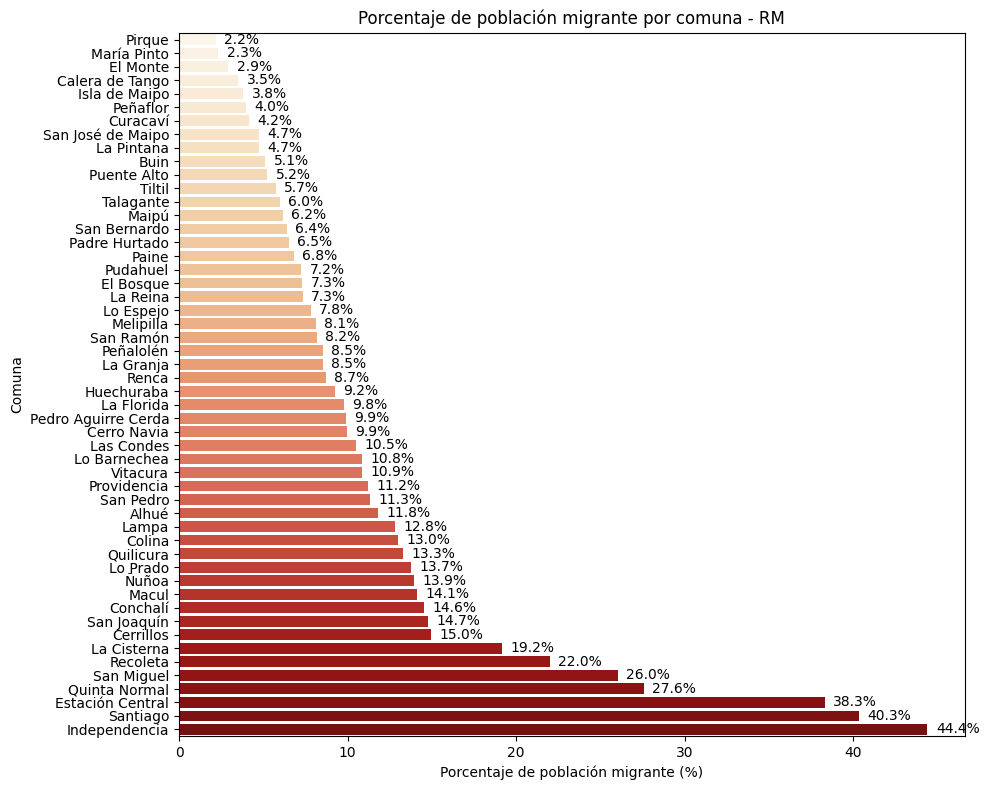

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar comunas por porcentaje
df_plot = gdf_rm.sort_values("porcentaje", ascending=True)



plt.figure(figsize=(10, 8))
sns.barplot(x="porcentaje", y="Comuna", data=df_plot, palette="OrRd")

plt.xlabel("Porcentaje de población migrante (%)")
plt.ylabel("Comuna")
plt.title("Porcentaje de población migrante por comuna - RM")

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["porcentaje"]):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center')

plt.tight_layout()
plt.show()

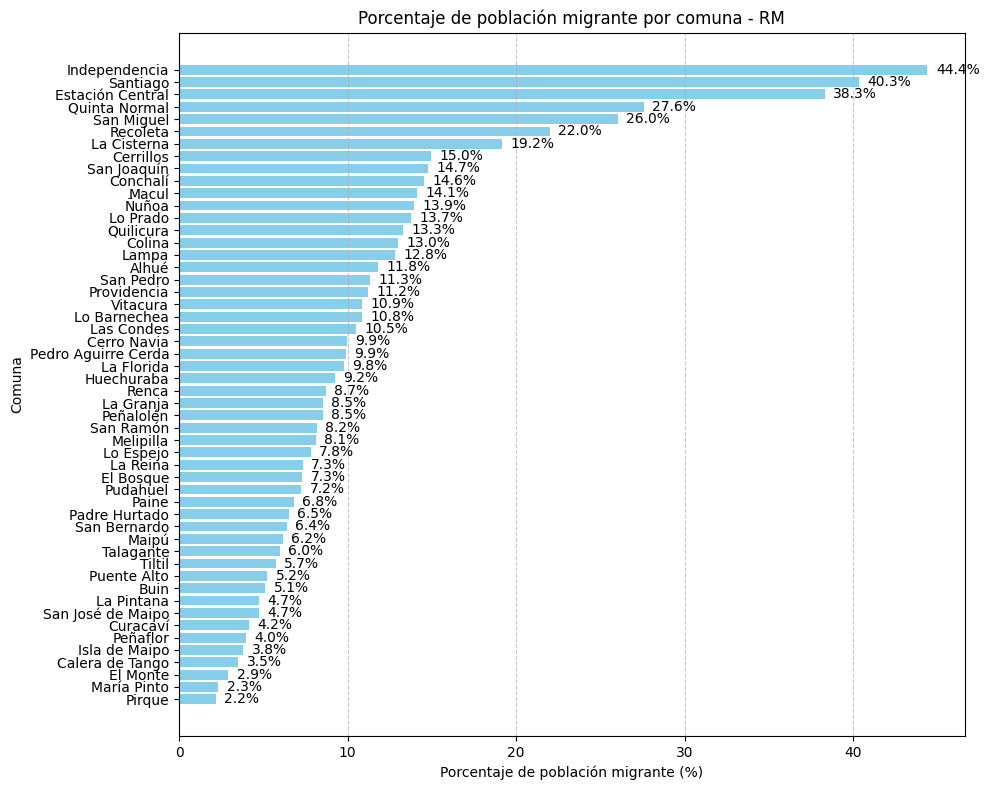

In [18]:
import matplotlib.pyplot as plt

# Ordenar de mayor a menor
df_plot = gdf_rm.sort_values("porcentaje", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_plot["Comuna"], df_plot["porcentaje"], color="skyblue")
plt.xlabel("Porcentaje de población migrante (%)")
plt.ylabel("Comuna")
plt.title("Porcentaje de población migrante por comuna - RM")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["porcentaje"]):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center')

# Invertir eje y para que la barra más alta quede arriba
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [26]:

ruta_hosp = "../../../../data/processed_data/red_hospitalaria.csv"

df_hosp = pd.read_csv(ruta_hosp)
df_hosp.head()

,Código Región,Nombre Región,Pertenencia al SNSS,Tipo Establecimiento (Unidad),Ámbito de Funcionamiento,Nombre Oficial,Dependencia Administrativa,Nivel de Atención,Código Comuna,Nombre Comuna,Tiene Servicio de Urgencia,Tipo de Urgencia,Clasificación Tipo de SAPU,LATITUD [Grados decimales],LONGITUD [Grados decimales],Tipo de Prestador Sistema de Salud,Estado de Funcionamiento,Nivel de Complejidad,Tipo de Atención
0,12,Región De Magallanes y de la Antártica Chilena,Perteneciente al Sistema Nacional de Servicios...,Hospital,Establecimiento de Salud,Hospital Comunitario Cristina Calderón de Puer...,Servicio de Salud,Primario,12201,Cabo de Hornos,SI,Urgencia Hospitalaria (UEH),No Aplica,-54.93521,-67.60039,Público,Vigente en operación habitual,Baja Complejidad,Atención Cerrada-Hospitalaria
1,12,Región De Magallanes y de la Antártica Chilena,No perteneciente al Sistema Nacional de Servic...,Hospital,Establecimiento de Salud,Hospital Naval (Puerto Williams),Fuerzas Armadas y de Orden (FFAA),Terciario,12201,Cabo de Hornos,SI,Urgencia Hospitalaria (UEH),No Aplica,-54.934374,-67.608895,Fuerzas Armadas y de Orden,Vigente en operación habitual,Mediana Complejidad,Atención Cerrada-Hospitalaria
2,12,Región De Magallanes y de la Antártica Chilena,Perteneciente al Sistema Nacional de Servicios...,Posta de Salud Rural (PSR),Establecimiento de Salud,Posta de Salud Rural Cameron,Municipal,Primario,12303,Timaukel,NO,No Aplica,No Aplica,-53.64055,-69.64585,Público,Vigente en operación habitual,Baja Complejidad,Atención Abierta-Ambulatoria
3,12,Región De Magallanes y de la Antártica Chilena,Perteneciente al Sistema Nacional de Servicios...,Posta de Salud Rural (PSR),Establecimiento de Salud,Posta de Salud Rural Agua Fresca,Municipal,Primario,12101,Punta Arenas,NO,No Aplica,No Aplica,-53.40424,-70.99016,Público,Vigente en operación habitual,Baja Complejidad,Atención Abierta-Ambulatoria
4,12,Región De Magallanes y de la Antártica Chilena,Perteneciente al Sistema Nacional de Servicios...,Hospital,Establecimiento de Salud,Hospital Dr. Marco Antonio Chamorro (Porvenir),Servicio de Salud,Primario,12301,Porvenir,SI,Urgencia Hospitalaria (UEH),No Aplica,-53.29816,-70.35838,Público,Vigente en operación habitual,Baja Complejidad,Atención Cerrada-Hospitalaria


In [34]:
df_hosp_13 = df_hosp[df_hosp["Código Región"] == 13]
df_hosp_13_pub = df_hosp_13[df_hosp_13["Tipo de Prestador Sistema de Salud"] == "Público "]
df_hosp_13_privado = df_hosp_13[df_hosp_13["Tipo de Prestador Sistema de Salud"] == "Privado"]
df_hosp_13.head()

,Código Región,Nombre Región,Pertenencia al SNSS,Tipo Establecimiento (Unidad),Ámbito de Funcionamiento,Nombre Oficial,Dependencia Administrativa,Nivel de Atención,Código Comuna,Nombre Comuna,Tiene Servicio de Urgencia,Tipo de Urgencia,Clasificación Tipo de SAPU,LATITUD [Grados decimales],LONGITUD [Grados decimales],Tipo de Prestador Sistema de Salud,Estado de Funcionamiento,Nivel de Complejidad,Tipo de Atención
36,13,Región Metropolitana de Santiago,No perteneciente al Sistema Nacional de Servic...,Clínica Dental,Establecimiento de Salud,CEINSA,Privado,No Aplica,13201,Puente Alto,NO,No Aplica,No Aplica,-33.605288,-70.570507,Privado,Vigente en operación habitual,Mediana Complejidad,Atención Abierta-Ambulatoria
529,13,Región Metropolitana de Santiago,Perteneciente al Sistema Nacional de Servicios...,Clínica Dental,Establecimiento de Salud,Centro de Especialidades Odontológicas Leng,Municipal,No Aplica,13123,Providencia,NO,No Aplica,No Aplica,-33.433596,-70.617745,Público,Vigente en operación habitual,No Aplica,Atención Abierta-Ambulatoria
635,13,Región Metropolitana de Santiago,No perteneciente al Sistema Nacional de Servic...,Clínica Dental,Establecimiento de Salud,Centro Dental RedSalud Apoquindo,Privado,No Aplica,13114,Las Condes,NO,No Aplica,No Aplica,-33.41253,-70.540345,Privado,Vigente en operación habitual,Mediana Complejidad,Atención Abierta-Ambulatoria
652,13,Región Metropolitana de Santiago,Perteneciente al Sistema Nacional de Servicios...,Clínica Dental,Establecimiento de Salud,Centro Odontológico La Reina,Municipal,No Aplica,13113,La Reina,NO,No Aplica,No Aplica,-33.452528,-70.534632,Público,Vigente en operación habitual,No Aplica,Atención Abierta-Ambulatoria
855,13,Región Metropolitana de Santiago,Perteneciente al Sistema Nacional de Servicios...,Clínica Dental,Establecimiento de Salud,Centro Odontológico Macul,Municipal,No Aplica,13118,Macul,NO,No Aplica,No Aplica,-33.493489,-70.614616,Público,Vigente en operación habitual,No Aplica,Atención Abierta-Ambulatoria


In [28]:
df_hosp_13["Tipo Establecimiento (Unidad)"].unique()

array(['Clínica Dental', 'Vacunatorio',
       'Centro de Salud Familiar (CESFAM)',
       'Servicio de Urgencia Rural (SUR)', 'Posta de Salud Rural (PSR)',
       'Centro Comunitario de Salud Familiar (CECOSF)',
       'Centro de Salud Privado',
       'Servicio de Atención Primaria de Urgencia (SAPU)', 'Hospital',
       'Consultorio General Rural (CGR)',
       'Centro Comunitario de Salud Mental  (COSAM)', 'Clínica',
       'Servicio de Atención Primaria de Urgencia de Alta Resolutividad (SAR)',
       'Centro de Referencia de Salud (CRS)', 'Laboratorio Clínico',
       'Dispositivo Incorporado por Crisis Sanitaria',
       'Unidad de Salud Funcionarios ', 'Dirección Servicio de Salud',
       'Programa de Reparación y Atención Integral de Salud (PRAIS)',
       'Centro de Especialidad', 'Centro de Diálisis',
       'Especialidades  Primarias',
       'Centro Corporación para la Nutrición Infantil (CONIN)',
       'Atención Remota',
       'Centro de Regulación Médica de las Urgenc

In [35]:
df_hosp_13_pub["Tipo Establecimiento (Unidad)"].unique()

array(['Clínica Dental', 'Centro de Salud Familiar (CESFAM)',
       'Servicio de Urgencia Rural (SUR)', 'Posta de Salud Rural (PSR)',
       'Centro Comunitario de Salud Familiar (CECOSF)',
       'Servicio de Atención Primaria de Urgencia (SAPU)', 'Hospital',
       'Consultorio General Rural (CGR)',
       'Centro Comunitario de Salud Mental  (COSAM)',
       'Servicio de Atención Primaria de Urgencia de Alta Resolutividad (SAR)',
       'Centro de Referencia de Salud (CRS)',
       'Dispositivo Incorporado por Crisis Sanitaria',
       'Unidad de Salud Funcionarios ', 'Dirección Servicio de Salud',
       'Programa de Reparación y Atención Integral de Salud (PRAIS)',
       'Centro de Especialidad', 'Especialidades  Primarias',
       'Atención Remota',
       'Centro de Regulación Médica de las Urgencias (SAMU)',
       'Unidad de Procedimientos Móvil ', 'Vacunatorio',
       'Centro de Rehabilitación',
       'Centro de Apoyo Comunitario para Personas con Demencia'],
      dtype=

In [32]:
df_hosp_13_privado["Tipo Establecimiento (Unidad)"].unique()

array(['Clínica Dental', 'Vacunatorio', 'Centro de Salud Privado',
       'Clínica', 'Laboratorio Clínico', 'Hospital', 'Centro de Diálisis',
       'Centro Corporación para la Nutrición Infantil (CONIN)',
       'Sala  Externa de Toma de Muestras (SETM)'], dtype=object)

In [33]:
df_hosp_13["Tipo de Prestador Sistema de Salud"].unique()

array(['Privado', 'Público ', 'Pendiente', 'Fuerzas Armadas y de Orden'],
      dtype=object)

In [38]:
# Lista de centros a considerar
centros = [
    'Centro de Salud Familiar (CESFAM)',
    'Servicio de Urgencia Rural (SUR)',
    'Posta de Salud Rural (PSR)',
    'Centro Comunitario de Salud Familiar (CECOSF)',
    'Servicio de Atención Primaria de Urgencia (SAPU)',
    'Hospital'
]

df_filtrado_pub = df_hosp_13_pub[df_hosp_13_pub['Tipo Establecimiento (Unidad)'].isin(centros)]

# Agrupar por comuna y contar cantidad de centros
conteo_por_comuna = (
    df_filtrado_pub.groupby('Nombre Comuna')['Tipo Establecimiento (Unidad)']
    .value_counts()
    .unstack(fill_value=0)  # columnas = tipos de centro
    .reset_index()
)

# Agregar total de centros por comuna
conteo_por_comuna['Total_centros'] = conteo_por_comuna[centros].sum(axis=1)

centros_publicos= conteo_por_comuna[['Nombre Comuna','Total_centros']]

In [39]:
centros_publicos.head()

Tipo Establecimiento (Unidad),Nombre Comuna,Total_centros
0,Alhué,5
1,Buin,13
2,Calera de Tango,4
3,Cerrillos,4
4,Cerro Navia,9


In [43]:
# Lista de centros a considerar
centros = [
    'Centro de Salud Privado',
    'Clínica',
    'Laboratorio Clínico',
    'Hospital'
]

df_filtrado_privado = df_hosp_13_privado[df_hosp_13_privado['Tipo Establecimiento (Unidad)'].isin(centros)]

# Agrupar por comuna y contar cantidad de centros
conteo_por_comuna = (
    df_filtrado_privado.groupby('Nombre Comuna')['Tipo Establecimiento (Unidad)']
    .value_counts()
    .unstack(fill_value=0)  # columnas = tipos de centro
    .reset_index()
)

# Agregar total de centros por comuna
conteo_por_comuna['Total_centros_privados'] = conteo_por_comuna[centros].sum(axis=1)

centros_privados= conteo_por_comuna[['Nombre Comuna','Total_centros_privados']]

In [44]:
centros_privados.head()

Tipo Establecimiento (Unidad),Nombre Comuna,Total_centros_privados
0,Buin,6
1,Cerrillos,1
2,Colina,4
3,Conchalí,2
4,El Bosque,1


In [57]:
centros_total = centros_publicos.merge(
    centros_privados,
    on="Nombre Comuna",      # clave común
    how="left"               # tipo de join
)

# Reemplazar todos los NaN por 0
cols_num = ["Total_centros", "Total_centros_privados"]
centros_total[cols_num] = centros_total[cols_num].fillna(0).astype(int)

In [58]:
centros_total.head()

Tipo Establecimiento (Unidad),Nombre Comuna,Total_centros,Total_centros_privados
0,Alhué,5,0
1,Buin,13,6
2,Calera de Tango,4,0
3,Cerrillos,4,1
4,Cerro Navia,9,0


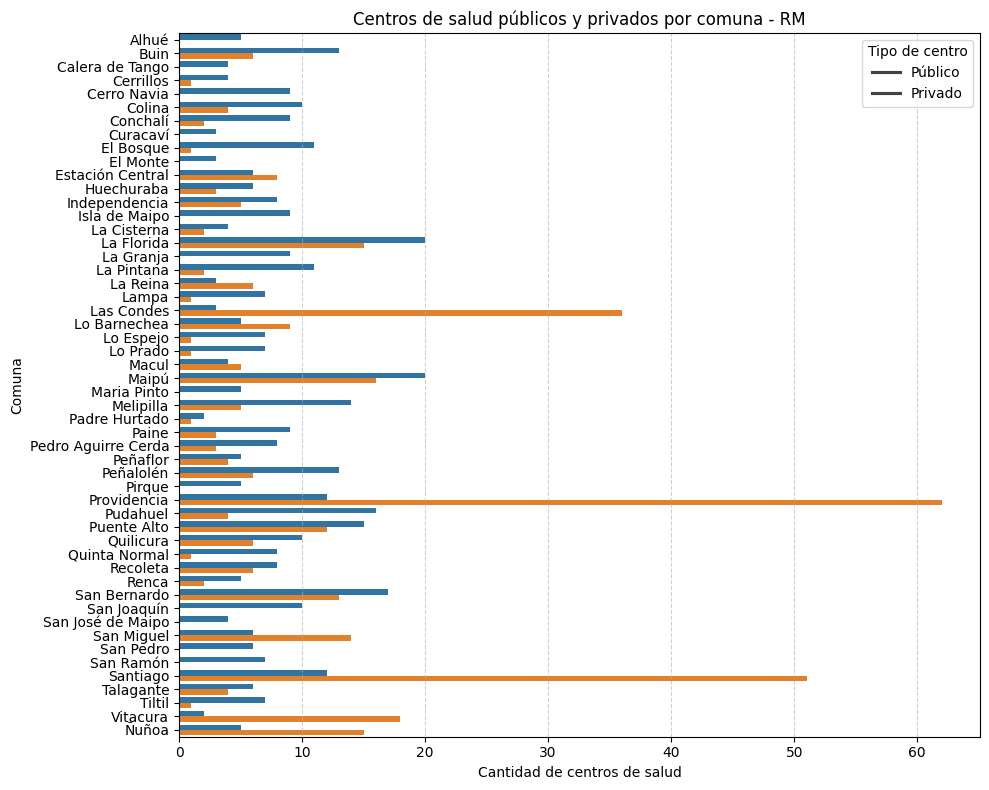

In [59]:
# Reorganizamos los datos para graficar fácilmente con seaborn
df_melt = centros_total.melt(
    id_vars="Nombre Comuna",
    value_vars=["Total_centros", "Total_centros_privados"],
    var_name="Tipo",
    value_name="Cantidad"
)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=df_melt,
    y="Nombre Comuna", 
    x="Cantidad", 
    hue="Tipo", 
    palette=["#1f77b4", "#ff7f0e"]  # azul y naranjo
)

plt.xlabel("Cantidad de centros de salud")
plt.ylabel("Comuna")
plt.title("Centros de salud públicos y privados por comuna - RM")
plt.legend(title="Tipo de centro", labels=["Público", "Privado"])
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()